In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_no = 3
bg = cv2.imread("raw_images/bg.png")
im1 = cv2.imread(f"raw_images/{image_no}.png")

(left, upper, right, lower) = (503, 263, 1436, 823)
bg = bg[upper:lower, left:right]
im1 = im1[upper:lower, left:right]

bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

In [3]:
im_sub = cv2.subtract(im1, bg)
im_sub = cv2.cvtColor(im_sub, cv2.COLOR_BGR2GRAY)

In [4]:
ret,thresh1 = cv2.threshold(im_sub,5,255,cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh1,kernel,iterations = 1)
erosion = cv2.erode(dilation,kernel,iterations = 1)

In [5]:
cv2.imshow('bg_sub', im_sub)
cv2.imshow('thresh1', thresh1)
cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
retval,labels = cv2.connectedComponents(erosion)

In [17]:
def plot_hist(im, mask):
    chans = cv2.split(im)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and
        # concatenate the resulting histograms for each
        # channel
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        # plot the histogram
        plt.plot(hist, color = color)
        plt.xlim([0, 256])
    plt.show()
    plt.close()

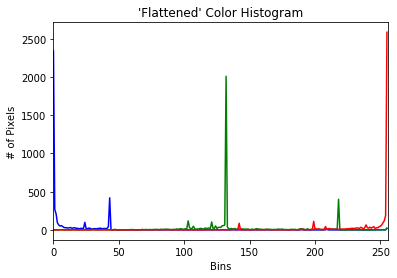

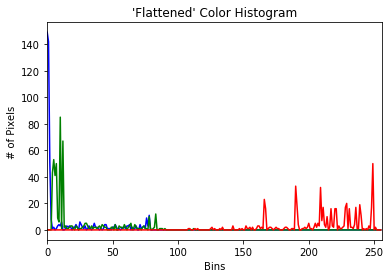

In [12]:
for i in range(1, retval):
    mask = np.zeros(labels.shape, dtype=np.uint8)
    mask[labels == i] = 255
    
    masked = cv2.bitwise_and(im1, im1, mask=mask)
    plot_hist(masked, mask)
    
    dir_path = f"proc_images/im_{image_no}"
    if(not os.path.exists(dir_path)):
        os.mkdir(dir_path)

    filename = f"proc_images/im_{image_no}/item_{i}.png"
    cv2.imwrite(filename, mask)
    
#     cv2.imshow('component_mask', mask)
#     cv2.imshow('component', masked)
#     cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [21]:
def image_segmentation(image_no):
    bg = cv2.imread("raw_images/bg.png")
    im1 = cv2.imread(f"raw_images/{image_no}.png")

    (left, upper, right, lower) = (503, 263, 1436, 823)
    bg = bg[upper:lower, left:right]
    im1 = im1[upper:lower, left:right]

    bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
    im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

    im_sub = cv2.subtract(im1, bg)
    im_sub = cv2.cvtColor(im_sub, cv2.COLOR_BGR2GRAY)

    ret,thresh1 = cv2.threshold(im_sub,5,255,cv2.THRESH_BINARY)

    kernel = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(thresh1,kernel,iterations = 2)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    
#     cv2.imshow('erosion', erosion)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    retval,labels = cv2.connectedComponents(erosion)
    
    print(f"image no. {image_no}")
    for i in range(1, retval):
        mask = np.zeros(labels.shape, dtype=np.uint8)
        mask[labels == i] = 255

        masked = cv2.bitwise_and(im1, im1, mask=mask)
        plot_hist(masked, mask)

        dir_path = f"proc_images/im_{image_no}"
        if(not os.path.exists(dir_path)):
            os.mkdir(dir_path)

        filename = f"proc_images/im_{image_no}/masked_{i}.png"
        cv2.imwrite(filename, mask)
        
        filename = f"proc_images/im_{image_no}/item_{i}.png"
        cv2.imwrite(filename, masked)

    #     cv2.imshow('component_mask', mask)
    #     cv2.imshow('component', masked)
    #     cv2.waitKey(0)

    cv2.destroyAllWindows()

image no. 1


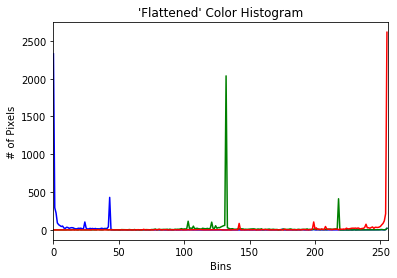

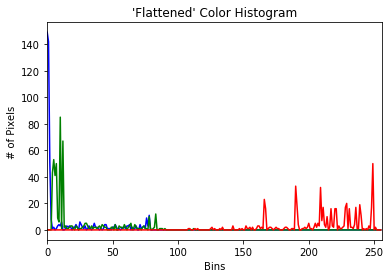

image no. 2


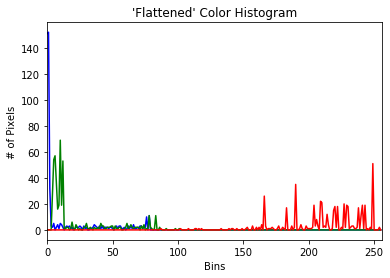

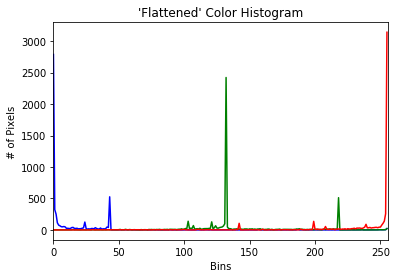

image no. 3


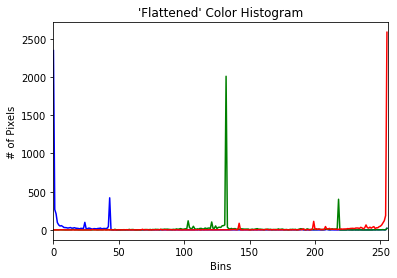

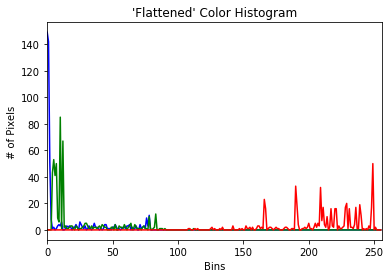

image no. 4


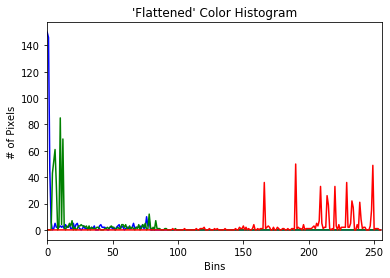

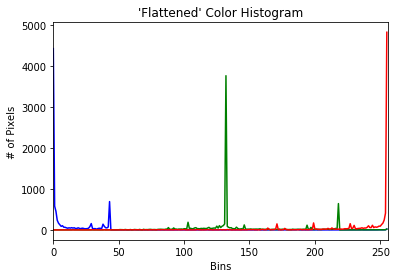

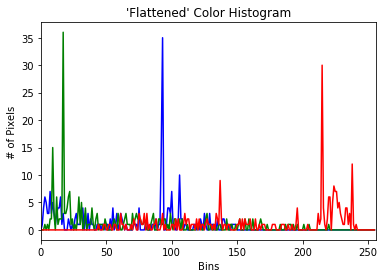

image no. 5


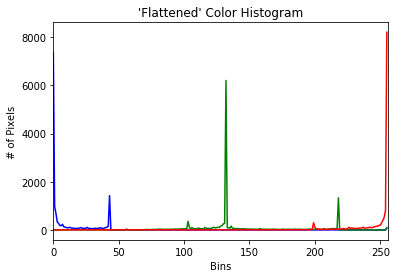

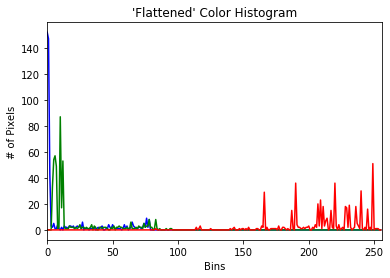

image no. 6


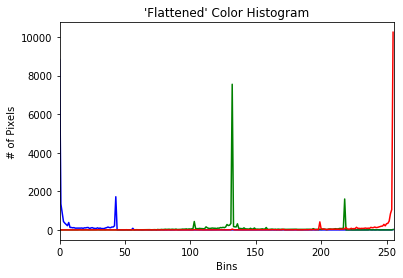

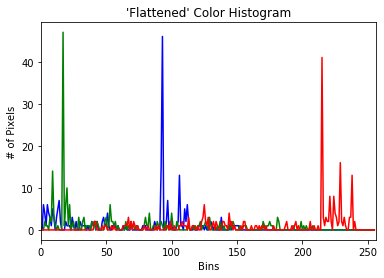

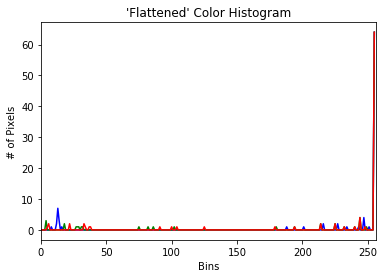

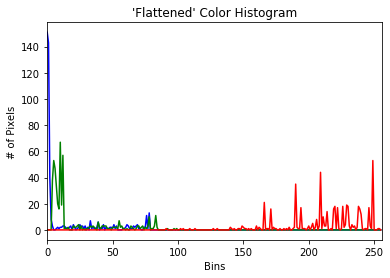

image no. 7


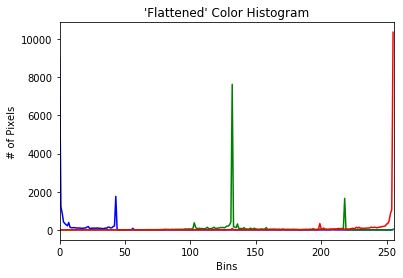

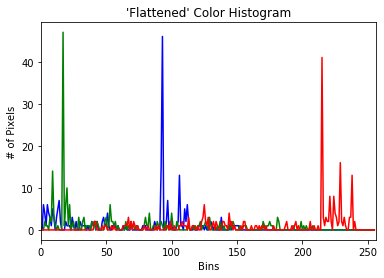

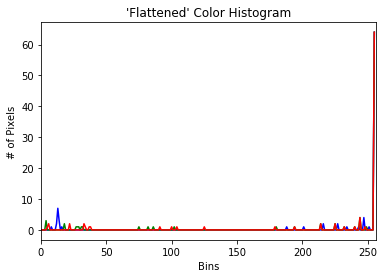

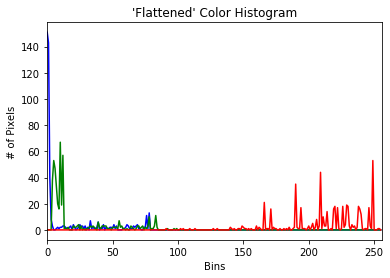

image no. 8


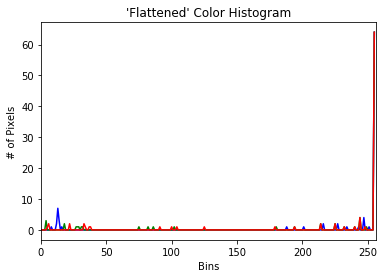

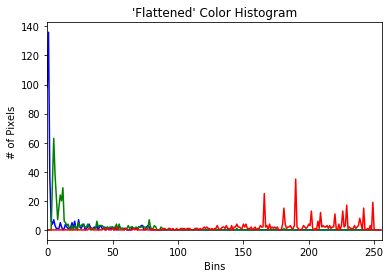

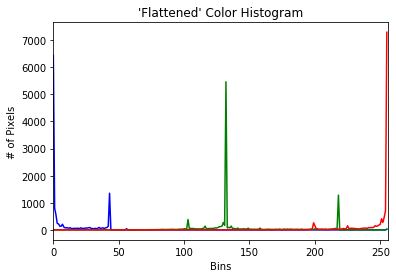

image no. 9


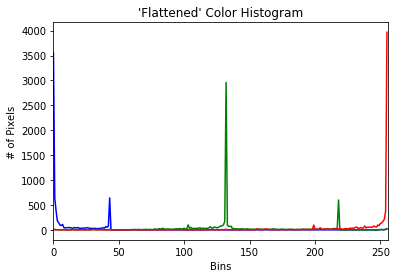

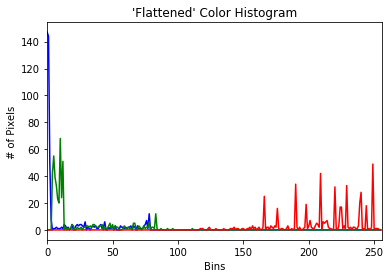

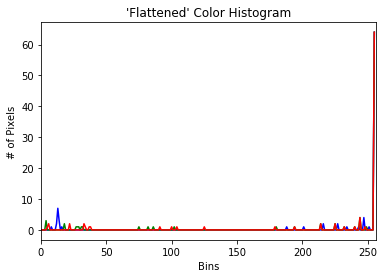

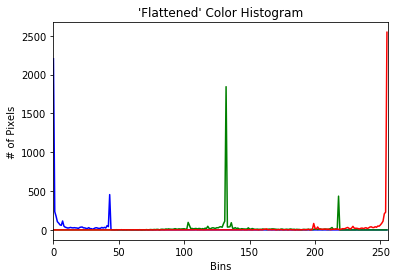

image no. 10


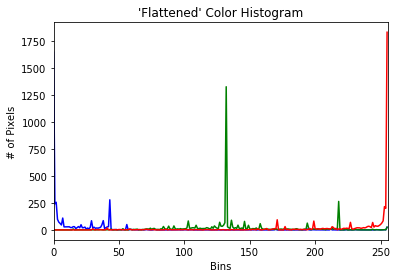

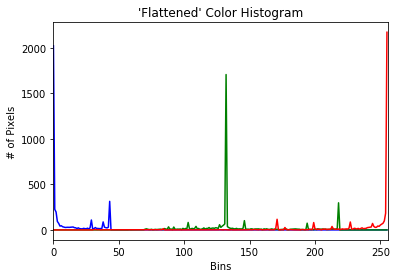

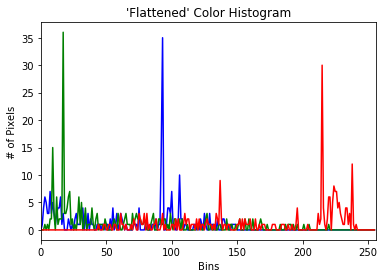

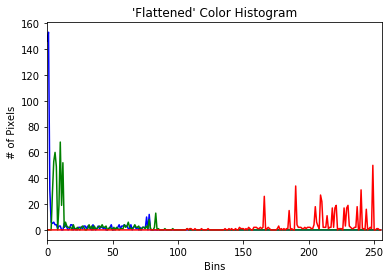

In [22]:
for i in range(1, 11):
    image_segmentation(i)

In [11]:
image_segmentation(4)